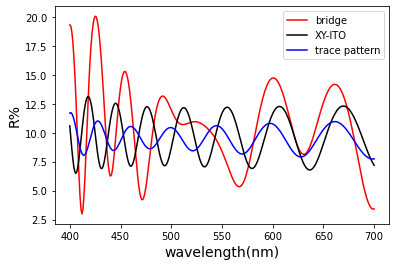

18.647148459116167
33.8526757472194
delta_dt: 1.8193073094249135
delta_db: 3.3028331685962726
trace 9.499643956010887
bridge: 10.54836282155942
diamond: 9.756490722502376


In [7]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

wl = np.linspace(400, 700, 301)
##################
sub_LENS = ml.Non_Dispersion(1.65)
OC_LENS = ml.open_material('OC_LENS', 'Material')
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')
ITO_LENS = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN_LENS = ml.Cauchy([1.97812451, 0.0100578])
SiO2_LENS = ml.Cauchy([1.50818418, 0.00141496727])
#################
air = ml.Non_Dispersion(1)
OC = ml.Cauchy([1.51082517, 5.69129102e-03], 9.70850610e-04)
SiN = ml.Cauchy([1.85001015, 3.50497748e-03], 4.50757521e-04)
SiO2 = ml.Cauchy([1.48878307, 1.44759349e-03], 8.82534146e-04)
ITO = ml.Cauchy([1.68689504, 5.38710310e-02], 8.33721475e-03)
sub = ml.Cauchy([1.52990893, 1.48423855e-03])
angle = 60

hypo_dia = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sub],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, angle)

hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sub],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl, angle)

hypo_bri = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sub],
    [None, th[0]-1250-149.771, th[1], th[2], th[3], 1250 ,149.771,th[4], th[5], None]
).reflectance(wl, angle)

m1 = [1887.6, 6.6, 41.6, 16.2, 28.6, 8.4]
m2 = [2460, 15.8, 42.62, 24.61, 21.54, 8.4]
m3 = [2400, 17.05, 44.15, 22.08, 19.22, 12.27]
tk = m3
plt.plot(wl, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('LENS_rev3_simulation.png')
plt.show()

delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
delta_d_b = np.mean(abs(100*(hypo_dia(tk)-hypo_bri(tk))))
print(100*delta_d_t/np.mean(100*hypo_dia(tk)))
print(100*delta_d_b/np.mean(100*hypo_dia(tk)))
print('delta_dt:',delta_d_t)
print('delta_db:',delta_d_b)
print('trace',np.mean(100*hypo_tra(tk)))
print('bridge:',np.mean(100*hypo_bri(tk)))
print('diamond:',np.mean(100*hypo_dia(tk)))

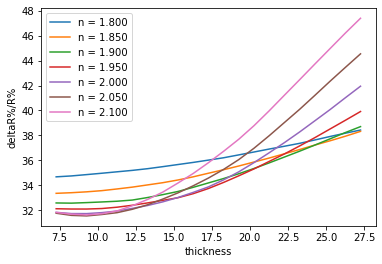

In [8]:
for x in np.linspace(1.8,2.1,7):
    SiN = ml.Non_Dispersion(x)
    hypo_dia = lambda th: tm.Design(
        [air, OC, SiN, SiO2, ITO, SiO2, SiN, sub],
        [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
    ).reflectance(wl, angle)
    hypo_tra = lambda th: tm.Design(
        [air, OC, SiN, SiO2, SiO2, SiN, sub],
        [None, th[0], th[1], th[2], th[4], th[5], None]
    ).reflectance(wl, angle)
    hypo_bri = lambda th: tm.Design(
        [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sub],
        [None, th[0]-1250-149.771, th[1], th[2], th[3], 1250 ,149.771,th[4], th[5], None]
    ).reflectance(wl, angle)
    dtl = []
    dbl = []
    d = np.linspace(7.27, 27.27, 21)
    for y in d:
        tk = [2430, 17.05, 44.15, 22.08, 19.22, y]
        delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
        delta_d_b = np.mean(abs(100*(hypo_dia(tk)-hypo_bri(tk))))
        dt = (100*delta_d_t/np.mean(100*hypo_dia(tk)))
        db = (100*delta_d_b/np.mean(100*hypo_dia(tk))) 
        #dtl.append(dt)
        dbl.append(db)
    #plt.plot(d, dtl, label = 'n = {:.3f}'.format(x))
    plt.plot(d, dbl, label = 'n = {:.3f}'.format(x))
#plt.plot(12.27, 34, 'ks')

plt.xlabel('thickness')
plt.ylabel('deltaR%/R%')
plt.legend(loc = 'best')
plt.savefig('rev3_SiN_bridge_60.png')
plt.show()

In [ ]:
dtL1 = []
dtL2 = []
dtL3 = []
dtL4 = []
dtL5 = []
dtL6 = []

d = np.linspace(15,75,61)

In [ ]:
for y in d/SiN.nvalues(700):
    tk = [2400, 17.05, 44.15, 22.08, 19.22, y]
    delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
    dt = (100*delta_d_t/np.mean(100*hypo_dia(tk)))
    dtL1.append(dt)

In [ ]:
for y in d/SiO2.nvalues(700):
    tk = [2400, 17.05, 44.15, 22.08, y, 12.27]
    delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
    dt = (100*delta_d_t/np.mean(100*hypo_dia(tk)))
    dtL2.append(dt)

In [ ]:
for y in d/ITO.nvalues(700):
    tk = [2400, 17.05, 44.15, y, 19.22, 12.27]
    delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
    dt = (100*delta_d_t/np.mean(100*hypo_dia(tk)))
    dtL3.append(dt)    

In [ ]:
for y in d/SiO2.nvalues(700):
    tk = [2400, 17.05, y, 22.08, 19.22, 12.27]
    delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
    dt = (100*delta_d_t/np.mean(100*hypo_dia(tk)))
    dtL4.append(dt)

In [ ]:
for y in d/SiN.nvalues(700):
    tk = [2400, y, 44.15, 22.08, 19.22, 12.27]
    delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
    dt = (100*delta_d_t/np.mean(100*hypo_dia(tk)))
    dtL5.append(dt)

In [ ]:
for y in d/SiN.nvalues(700):
    tk = [2400, 17.05, 44.15, 22.08, 19.22, 12.27]
    delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
    dt = (100*delta_d_t/np.mean(100*hypo_dia(tk)))
    dtL6.append(dt)

In [ ]:
plt.plot(d, dtL6, '--k',label = 'current design')
plt.plot(d, dtL5, 'purple', label = 'top SiN')
plt.plot(d, dtL4, 'orange', label = 'top SiO2')
plt.plot(d, dtL3, 'green',label = 'ITO')
plt.plot(d, dtL2, 'red', label = 'bot SiO2')
plt.plot(d, dtL1, 'blue',label = 'bot SiN')
plt.legend(loc = 'lower left')
plt.xlabel('Optical thickness (n*d)', fontsize = 14)
plt.ylabel('ΔR%/R% (trace pattern)', fontsize = 14)
plt.xlim(15,75)
plt.ylim(0,50)
#plt.savefig('700OT.png')
plt.show()